# Diabetes Prediction Using Machine Learning

This notebook uses machine learning and python to predict whether or not someone has diabetes based on their medical attributes and information.

This project was build depending on the following machine learning modelling framework
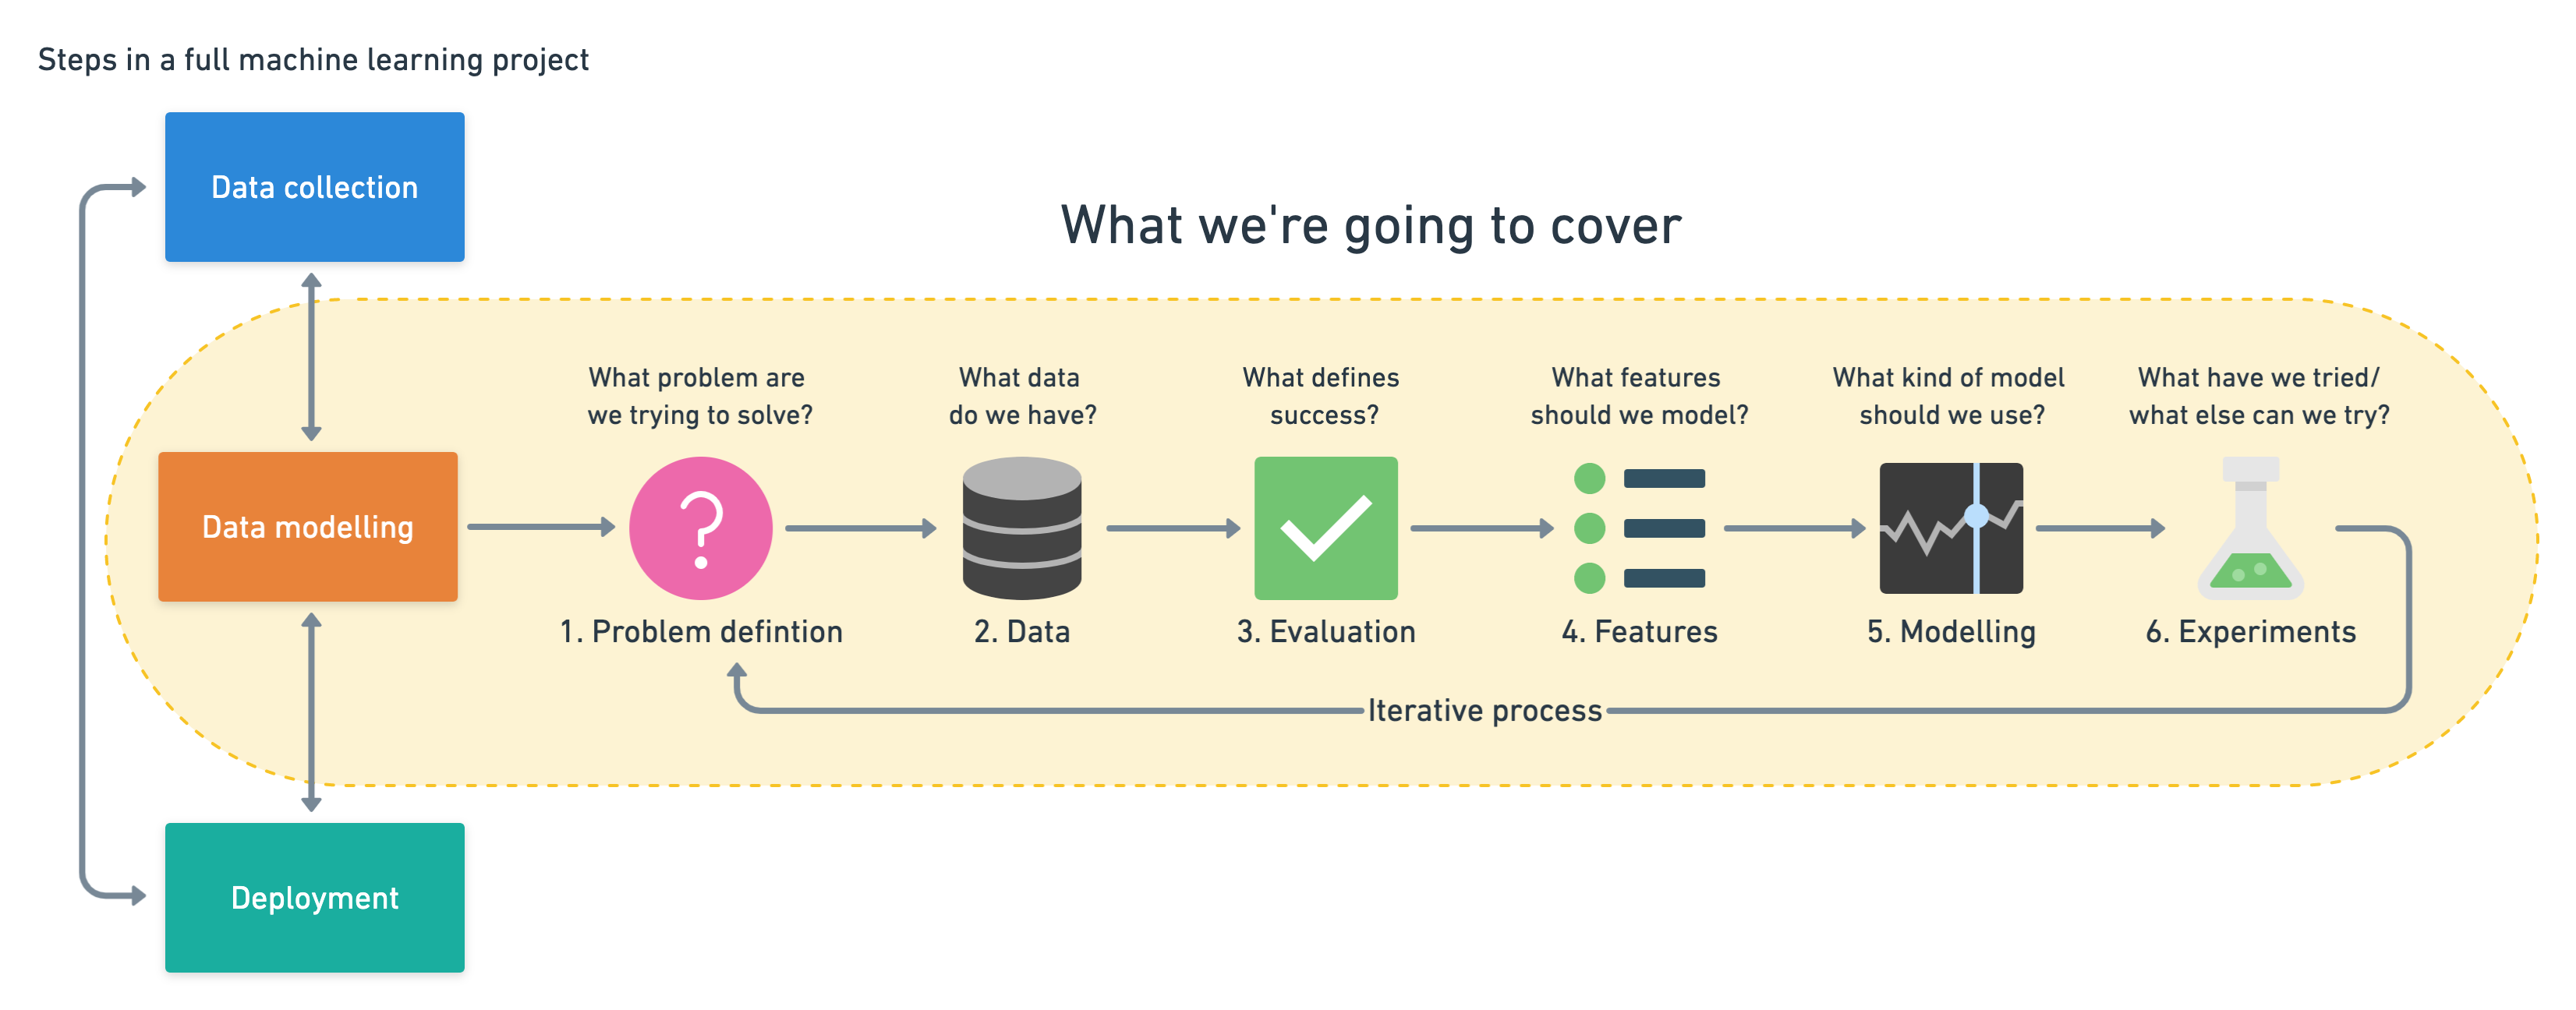

# 1 - Problem Definition

Simply, based on some medical attributes of a patient (patient record), can we predict whether or not they have diabetes?

# 2 - Data

This data is from Kaggle made by Mohammed Mustafa. [Dataset Link](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

#### About the dataset
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

# 3 - Evaluation

We will try to reach a high accuracy at predicting whether or not a patient has diabetes **>%95 Accuracy**, also avoiding predicting that someone does not have diabetes while they actual does have diabetes, because this is more dangerous than predicting that someone does have diabetes while they does not.

# 4 - Features

The diabetes_prediction_dataset.csv file contains medical and demographic data of patients along with their diabetes status, whether positive or negative. It consists of various features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

The Dataset can be utilized to construct machine learning models that can predict the likelihood of diabetes in patients based on their medical history and demographic details.

- `gender`: Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes. There are three categories in it male ,female and other.

- `age`: Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.

- `hypertension`: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.

- `heart_disease`: Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.

- `smoking_history`: Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever.

- `bmi`: BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.

- `HbA1c_level`: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.

- `blood_glucose_level`: Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.

- `diabetes`: Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the

# Preparing tools (imports)
Importing numpy, pandas, matplotlib, seaborn, and all used matrics, imputers, encoders, scalers, and classification models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split, cross_val_score,\
                                    RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,\
                            precision_score, recall_score, f1_score,\
                            roc_curve, roc_auc_score

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Loading and reading data

In [2]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.shape

(100000, 9)

In [3]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [4]:
# rename the last column to avoid confusion
data.rename(columns = {'diabetes': 'target'}, inplace = True)

In [5]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,target
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


# Finding simple patterns and exploration data (EDA)

In [6]:
# count the number of entries with diabetes and without diabetes & find percentage
print(data.target.value_counts())
print()
print(data.target.value_counts(normalize=True))

0    91500
1     8500
Name: target, dtype: int64

0    0.915
1    0.085
Name: target, dtype: float64


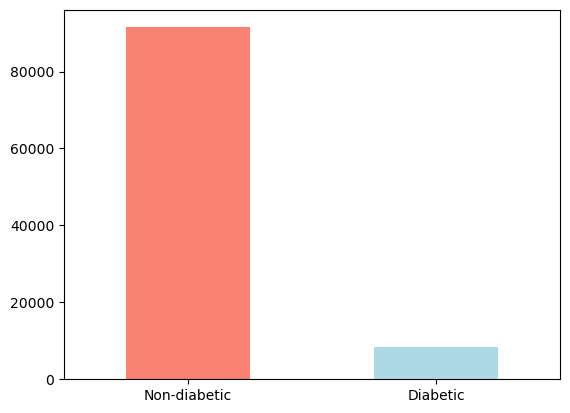

In [7]:
# finding the number and the of diabetic entries in the dataset
data['target'].map({
    0: 'Non-diabetic',
    1: 'Diabetic'
}).value_counts().plot(kind="bar", color=["salmon", "lightblue"], rot = 0);

## Note
We can see that the dataset is imbalanced, there are so many more diabatic entries, which can cause some problems when building the model, and we cannot depend only on `accuracy` metric, because the model can predict all entries to be non-diabatic and still have high accuarcy.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   target               100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,target
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [10]:
data.age.value_counts()

80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64

## Note
We can see that the age ranges from [0.08, 80], having non-integers as ages means months, so an entry with age equal to `0.08` means that the entry is a 1 month old baby.

In [11]:
data.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

### Lets see the number of diabatic and non-diabatic males and females

In [12]:
pd.crosstab(data.target, data.gender)

gender,Female,Male,Other
target,,,
0,54091,37391,18
1,4461,4039,0


### Lets see the relation between the entries with heart diseases and diabetes

In [13]:
pd.crosstab(data.heart_disease, data.target) / data.target.count()

target,0,1
heart_disease,,
0,0.88825,0.07233
1,0.02675,0.01267


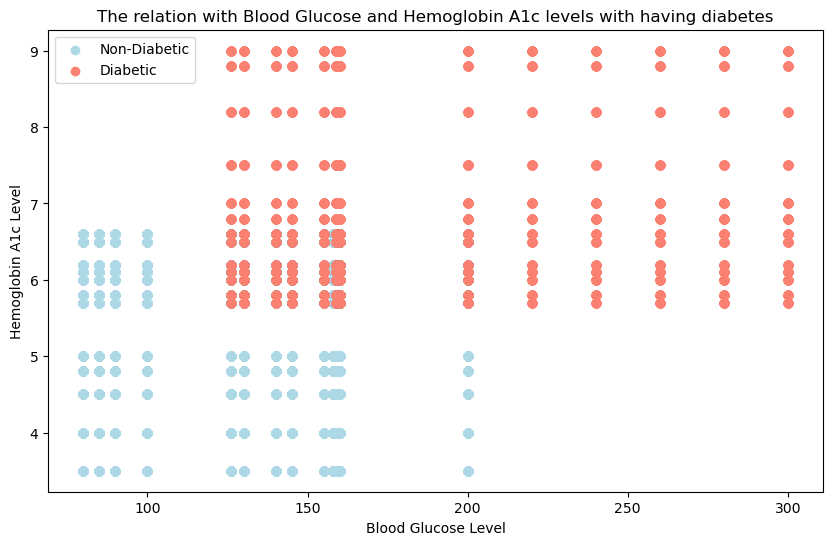

In [14]:
plt.figure(figsize = (10, 6))

plt.scatter(
    data.blood_glucose_level[data.target == 0],
    data.HbA1c_level[data.target == 0],
    c = 'lightblue'
)

plt.scatter(
    data.blood_glucose_level[data.target == 1],
    data.HbA1c_level[data.target == 1],
    c = 'salmon'
)

plt.title('The relation with Blood Glucose and Hemoglobin A1c levels with having diabetes')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Hemoglobin A1c Level')
plt.legend(['Non-Diabetic', 'Diabetic'])

plt.show()

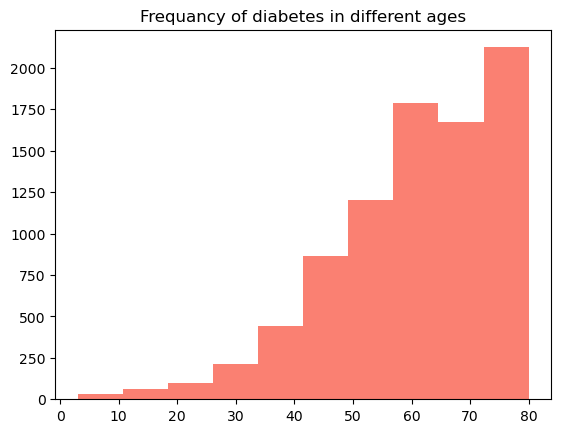

In [15]:
plt.hist(data.age[data.target == 1], color = 'salmon')
plt.title('Frequancy of diabetes in different ages')
plt.show()

### Finding simple realtions between all features
This may give an idea of which independent variables may or may not have an impact on our target variable.

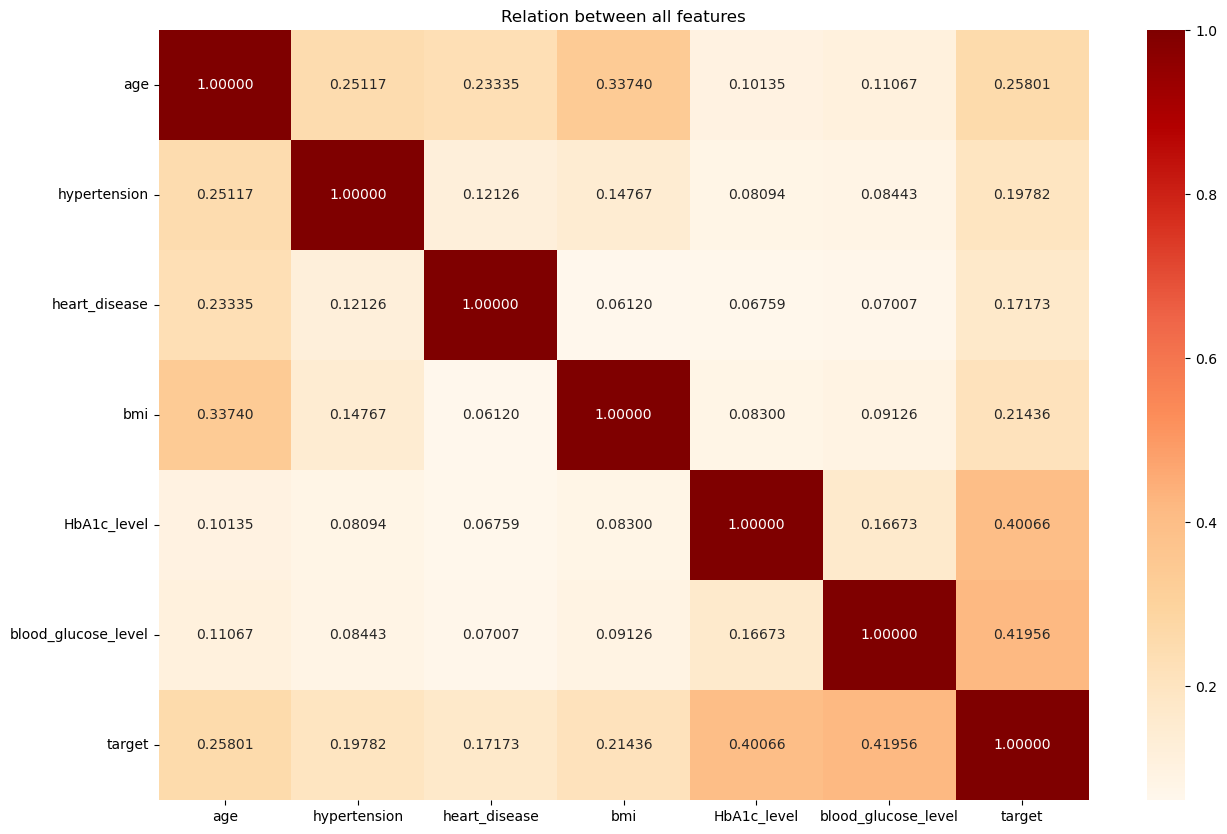

In [16]:
plt.figure(figsize=(15, 10))
plt.title('Relation between all features')
sns.heatmap(data.corr(numeric_only = True), annot = True, fmt = ".5f", cmap = "OrRd");

In [17]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,target
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


# Data preprocessing

#### Encoding `smoking_history` to numrical values

In [18]:
labels = ['never', 'current', 'former', 'ever', 'not current']
label_encoder = LabelEncoder()
label_encoder.fit(data['smoking_history'])
data['smoking_history'] = label_encoder.transform(data['smoking_history'])

#### Encoding `gender` to numrical values

In [19]:
data['gender'] = data['gender'].map({
    'Male': 0,
    'Female': 1,
    'Other': 2
})

In [20]:
data.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,target
0,1,80.0,0,1,4,25.19,6.6,140,0
1,1,54.0,0,0,0,27.32,6.6,80,0
2,0,28.0,0,0,4,27.32,5.7,158,0
3,1,36.0,0,0,1,23.45,5.0,155,0
4,0,76.0,1,1,1,20.14,4.8,155,0
5,1,20.0,0,0,4,27.32,6.6,85,0
6,1,44.0,0,0,4,19.31,6.5,200,1
7,1,79.0,0,0,0,23.86,5.7,85,0
8,0,42.0,0,0,4,33.64,4.8,145,0
9,1,32.0,0,0,4,27.32,5.0,100,0


In [21]:
X = data.drop('target', axis = 1)
y = data['target']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 39)
len(X_train), len(X_test), len(y_train), len(y_test)

(80000, 20000, 80000, 20000)

In [23]:
X_train.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
95520,1,50.00,1,0,4,29.60,6.1,159
40603,1,40.00,0,0,4,24.63,6.5,90
99930,1,54.00,0,0,5,27.32,6.5,80
14683,1,6.00,0,0,0,15.53,6.0,90
90229,1,49.00,0,0,4,33.42,6.5,130
1209,1,80.00,1,0,0,32.32,8.2,159
46199,1,33.00,0,0,3,27.39,4.8,100
69939,0,67.00,0,1,3,28.99,5.7,160
14219,0,52.00,1,0,4,37.59,6.1,130
62804,0,71.00,0,1,0,27.32,7.5,200


#### Scaling numerical columns to a range [0 - 1] to have a model that is not biased to a certian feature

In [24]:
numerical_cols = ['age','smoking_history','bmi', 'HbA1c_level', 'blood_glucose_level']

for col in numerical_cols:
    scaler = MinMaxScaler().fit(X_train[[col]])
    X_train[col] = scaler.transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

In [25]:
data.drop(columns = 'smoking_history', inplace = True)
X_train.drop(columns = 'smoking_history', inplace = True)
X_test.drop(columns = 'smoking_history', inplace = True)

In [26]:
X_train.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
95520,1,0.624625,1,0,0.248762,0.472727,0.359091
40603,1,0.499499,0,0,0.185651,0.545455,0.045455
99930,1,0.674675,0,0,0.219810,0.545455,0.000000
14683,1,0.074074,0,0,0.070095,0.454545,0.045455
90229,1,0.612112,0,0,0.297270,0.545455,0.227273


### Note:
There are entries in the `smoking_history` column that is **No Info**, which can be seen as `NaN` or missing values, I thought about imputing these values using `KNNImputer`, but realized that this can be a part of an input or an entry to predict, where we don't have info about the person's smoking history.

In [27]:
# data['smoking_history'] = data['smoking_history'].replace(0, np.nan)

# # temp['smoking_history'] = temp['smoking_history'].map({
# #     'never': 0,
# #     'former': 1,
# #     'not current': 2,
# #     'current': 3,
# #     'ever': 4,
# #     'No Info': np.nan
# # })

# imputer = KNNImputer(n_neighbors = 1)

# data = pd.DataFrame(imputer.fit_transform(data), columns = data.columns)

In [28]:
X_train.head(15)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
95520,1,0.624625,1,0,0.248762,0.472727,0.359091
40603,1,0.499499,0,0,0.185651,0.545455,0.045455
99930,1,0.674675,0,0,0.219810,0.545455,0.000000
14683,1,0.074074,0,0,0.070095,0.454545,0.045455
90229,1,0.612112,0,0,0.297270,0.545455,0.227273
1209,1,1.000000,1,0,0.283302,0.854545,0.359091
46199,1,0.411912,0,0,0.220698,0.236364,0.090909
69939,0,0.837337,0,1,0.241016,0.400000,0.363636
14219,0,0.649650,1,0,0.350222,0.472727,0.227273
62804,0,0.887387,0,1,0.219810,0.727273,0.545455


In [29]:
X_test.head(15)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
16596,1,0.949950,0,0,0.252063,0.418182,0.359091
33452,1,0.712212,0,0,0.281143,0.418182,0.363636
98302,1,0.149149,0,0,0.216000,0.400000,0.227273
18099,1,0.099099,0,0,0.117841,0.000000,0.354545
87334,1,0.461962,0,0,0.410794,0.000000,0.363636
34011,1,0.837337,0,0,0.219810,0.090909,0.363636
5894,1,0.349349,0,0,0.205587,0.090909,0.022727
28297,0,0.724725,0,0,0.390349,0.090909,0.090909
37067,1,0.662162,0,0,0.362921,0.272727,0.045455
21033,0,0.224224,0,0,0.263111,0.545455,0.022727


# 5 - Modelling
We will try different models, and find the best one and try to tune it to perform even better, we will not depend on default accuracy matric due to the reasons we mentioned before (data imbalance).

These are the models we are going to try:
- Logistic Regression
- K-Nearest Neighbors
- Random Forest Classifier
- Linear Support Vector Classification
- SGD-Classifier

We are going to score/evaluate the models depending on **Area Under the Receiver Operating Characteristic Curve** metric.

In [30]:
np.random.seed(39)

models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Linear SVC': LinearSVC(),
    'SGD': SGDClassifier()
}

models_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    models_scores[name] = roc_auc_score(y_test, model.predict(X_test))

models_scores

{'KNN': 0.8280280682497525,
 'Logistic Regression': 0.8079123259209894,
 'Random Forest': 0.840658127280627,
 'Linear SVC': 0.7966461512327226,
 'SGD': 0.7749561433597617}

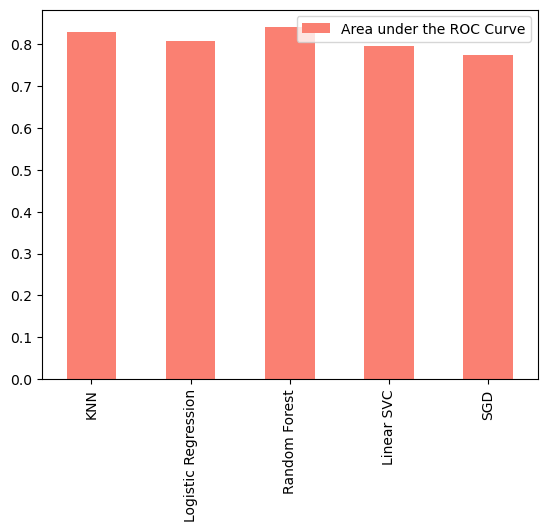

In [31]:
pd.DataFrame(models_scores, index = ['Area under the ROC Curve'])\
        .T.plot(kind = 'bar', color='salmon').legend(fontsize = 10);

### Note:
We found that Random Forest performed best between all models, so we are going to try the Random Forest model furthermore for it to perform even better.

We are going to try to find the best hyperparameters for it using `RandomSearchCV` first, which tries random hyperparameters from a given dictionary of hyperparamters, it will be evaluated depending on `Area Under the Receiver Operating Characteristic Curv` too, with 5-fold cross validation, it will try 25 different combinations of hyperparameters, this normally would take so long to process, but with setting `n_jobs` to 10, it will use 10 processors (parallelized) to perform it 10 times faster.

In [32]:
np.random.seed(39)

random_forest_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

def scorer(estimator, X_test, y_test):
    return roc_auc_score(y_test, estimator.predict(X_test))

random_forest_rs = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions = random_forest_grid,
    cv = 5,
    n_iter = 25,
    verbose = True,
    scoring = scorer,
    n_jobs = 10
)

random_forest_rs.fit(X_train, y_train)
random_forest_rs.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and

/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and

/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and

/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [33]:
np.random.seed(39)
roc_auc_score(y_test, random_forest_rs.predict(X_test))

0.8395975642822375

Now we have the best hyperparameters the `RandomSearchCV` found, now we will try to tune it even furthermore, with `GridSearchCV`, it will try **all** combinations in the given grid, instead of trying random combinations, and find the best hyperparameters.

In [34]:
random_forest_grid = {
    'bootstrap': [True, False],
    'max_depth': [100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 4],
    'min_samples_split': [2, 5],
    'n_estimators': [1200, 1400]
}

def scorer(estimator, X_test, y_test):
    return roc_auc_score(y_test, estimator.predict(X_test))

random_forest_gc = GridSearchCV(
    RandomForestClassifier(),
    param_grid = random_forest_grid,
    cv = 5,
    verbose = True,
    scoring = scorer,
    n_jobs = 10
)

random_forest_gc.fit(X_train, y_train)
random_forest_gc.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and

/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and

/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and

/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and

/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and

/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and

/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [35]:
np.random.seed(39)
roc_auc_score(y_test, random_forest_gc.predict(X_test))

0.8395975642822375

### Now we will use the best hyperparameters we found in our model and evaluate it.

In [36]:
model = RandomForestClassifier(
    bootstrap = False,
    max_depth = 70,
    max_features = 'sqrt',
    min_samples_leaf = 2,
    min_samples_split = 2,
    n_estimators = 1400
)
model.fit(X_train, y_train)
roc_auc_score(y_test, model.predict(X_test))

0.8395975642822375

In [37]:
y_test[:15]

16596    0
33452    0
98302    0
18099    0
87334    0
34011    0
5894     0
28297    0
37067    0
21033    0
26069    0
41019    0
26524    0
68082    0
98374    0
Name: target, dtype: int64

In [38]:
y_preds = model.predict(X_test)
y_preds[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
roc_auc_score(y_test, y_preds)

0.8395975642822375

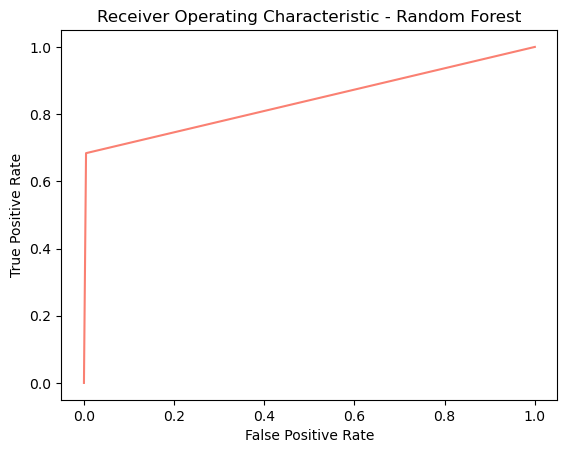

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_preds)
plt.plot(fpr, tpr, c = 'salmon', )
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.show()

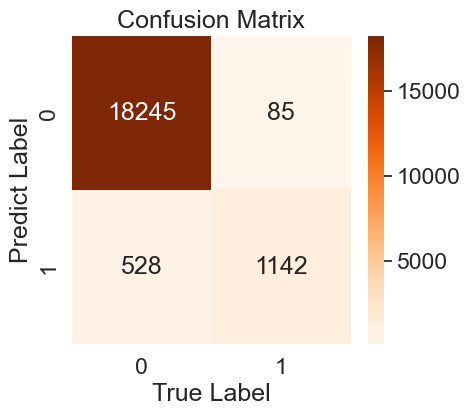

In [41]:
sns.set(font_scale = 1.5)

fig, ax = plt.subplots(figsize = (4.5, 4))
ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot = True, cbar = True, fmt = 'g', cmap = 'Oranges')
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predict Label');

In [42]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18330
           1       0.93      0.68      0.79      1670

    accuracy                           0.97     20000
   macro avg       0.95      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [43]:
cv_metrics = pd.DataFrame({
    "Accuracy": cross_val_score(model, X, y, cv = 5, scoring = 'accuracy', n_jobs = -1).mean(),
    "Precision": cross_val_score(model, X, y, cv = 5, scoring = 'precision', n_jobs = -1).mean(),
    "Recall": cross_val_score(model, X, y, cv = 5, scoring = 'recall', n_jobs = -1).mean(),
    "F1": cross_val_score(model, X, y, cv = 5, scoring = 'f1', n_jobs = -1).mean()
}, index = [0])

cv_metrics

,Accuracy,Precision,Recall,F1
0,0.97063,0.957849,0.686706,0.799682


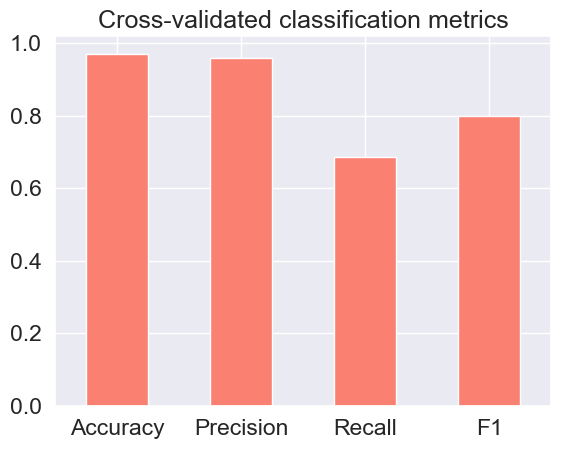

In [44]:
cv_metrics.T.plot.bar(rot = 0, legend = False, color = 'salmon')
plt.title('Cross-validated classification metrics');